In [105]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [78]:
# Download data\n",
#Churn Data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")


In [79]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [81]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [82]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [83]:
df.custcat.value_counts()

custcat
2.0    61
3.0    48
4.0    46
1.0    45
Name: count, dtype: int64

In [84]:
df.churn.value_counts()

churn
0.0    142
1.0     58
Name: count, dtype: int64

#### splittig & Normalization of your data

Eğer accuracy değerim düşük geliyorsa burada y 'yi değiştirebilirim

In [85]:
# 1 Normalizing & Splitting the Data
# Split the data into features (X) and target (y)
X = df.drop("churn",axis=1) #independent variables except custcat #
y = df["churn"].astype('int') #dependent variable as int

In [86]:
# from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Normalization

In [87]:
#from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler() #Normalization 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'Train Set: {X_train.shape, y_train.shape}')
print(f'Test Set:{ X_test.shape,y_test.shape}')

Train Set: ((160, 27), (160,))
Test Set:((40, 27), (40,))


Fitting and Evaluating the Model

In [88]:
#from sklearn import linear_model
logr = linear_model.LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
logr.fit(X,y)

LogisticRegression(C=0.01, solver='liblinear')

In [97]:
logr2=linear_model.LogisticRegression(C=0.01,solver='sag').fit(X_train,y_train)
logr2.fit(X,y)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, solver='sag')

Prediction

In [89]:
y_pred = logr.predict(X_test)
y_pred

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [98]:
# For logr2
y_pred2 = logr2.predict(X_test)
y_pred2

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

Evaluate Model

In [90]:
#Probability od Predictions
y_pred_prob=logr.predict_log_proba(X_test)
y_pred_prob[0:5]


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[-0.61279623, -0.78052297],
       [-0.60543766, -0.78929578],
       [-0.70756636, -0.67893296],
       [-0.8397808 , -0.5652909 ],
       [-0.68788742, -0.69843475]])

In [99]:
#For logr2
#Probability od Predictions
y_pred_prob2=logr2.predict_log_proba(X_test)
y_pred_prob2[0:5]

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[-0.69176967, -0.69452659],
       [-0.68776874, -0.6985547 ],
       [-0.69586204, -0.69043967],
       [-0.69223558, -0.69405961],
       [-0.68843624, -0.69788042]])

In [91]:
#Confusion Matrix

#from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[20 10]
 [ 3  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.41      0.70      0.52        10

    accuracy                           0.68        40
   macro avg       0.64      0.68      0.64        40
weighted avg       0.76      0.68      0.70        40



Confusion Matrix Display

In [109]:
conf_matrix

array([[20, 10],
       [ 3,  7]], dtype=int64)

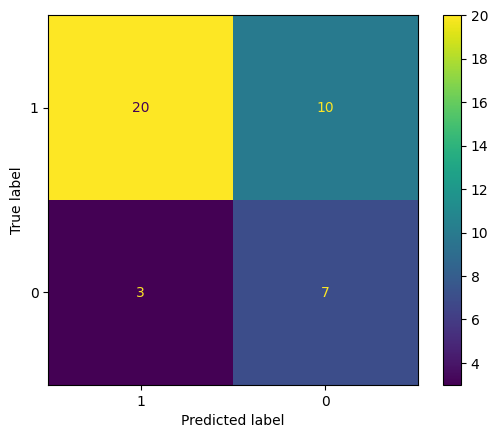

In [107]:
#from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 0])

conf_matrix_display.plot()
plt.show()


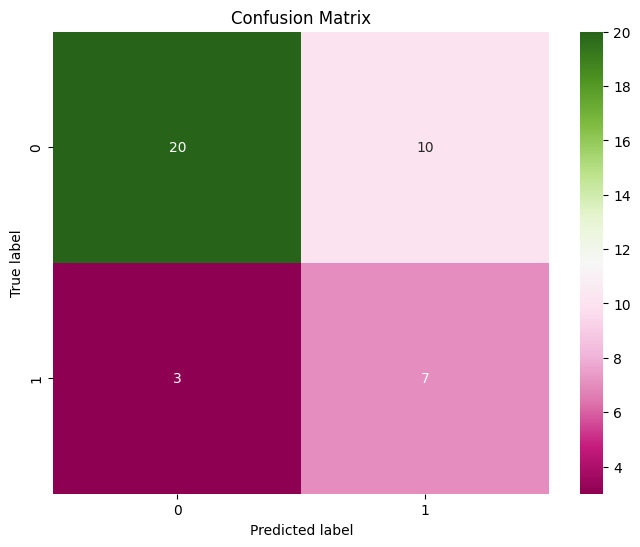

In [114]:
#Plot Choice 2 by HeatMap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PiYG')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

In [100]:
# For loggr2
conf_matrix2 = confusion_matrix(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)


print("\nConfusion Matrix:")
print(conf_matrix2)
print("\nClassification Report:")
print(classification_rep2)


Confusion Matrix:
[[15 15]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        30
           1       0.40      1.00      0.57        10

    accuracy                           0.62        40
   macro avg       0.70      0.75      0.62        40
weighted avg       0.85      0.62      0.64        40



In [111]:
conf_matrix2

array([[15, 15],
       [ 0, 10]], dtype=int64)

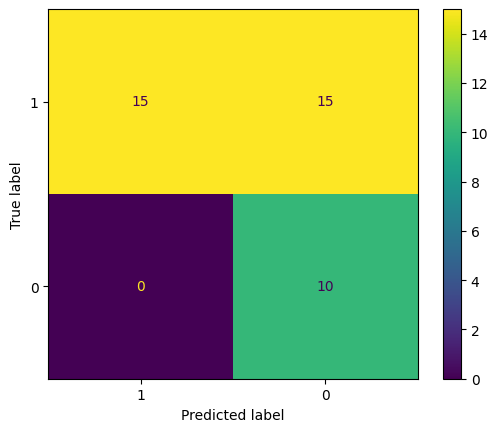

In [108]:
conf_matrix_display2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=[1, 0]) #True Pozitive, False Pozitive

conf_matrix_display2.plot()
plt.show()

In [92]:
#Jaccard Score
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_pred,pos_label=0)

0.6060606060606061

In [101]:
#for logr2
jaccard_score(y_test,y_pred2,pos_label=0)

0.5

In [93]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_prob) # Ne kadar küçük o kadar iyi

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0.6931471805599453

In [102]:
#For logr2 
log_loss(y_test,y_pred_prob2) # Ne kadar küçük o kadar iyi

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0.6931471805599453

Way 1 for Confusion Matrix accuracy

In [94]:
# TP, TN, FP, FN değerlerini alma
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Test set Accuracy:", accuracy)

Test set Accuracy: 0.675


Way 2 for Confusion Matrix accuracy

In [95]:
# from sklearn.metrics import accuracy_score : 
accuracy = accuracy_score(y_test, y_pred)
print("Test set Accuracy:", accuracy)

Test set Accuracy: 0.675


In [104]:
#For logr2
accuracy2 = accuracy_score(y_test, y_pred2)
print("Test set Accuracy:", accuracy2)

Test set Accuracy: 0.625


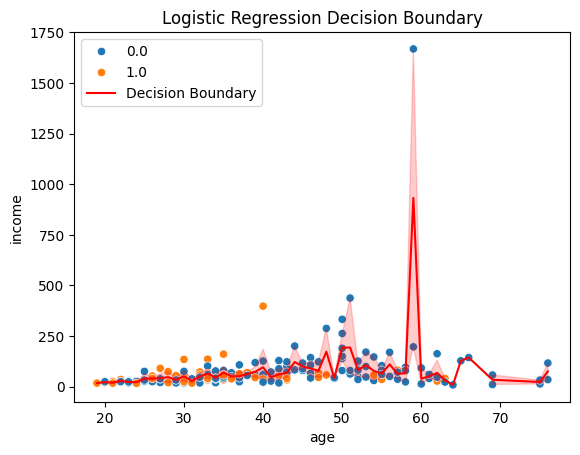

In [96]:
# Plot the decision boundary (for two features only, as a demonstration)
sns.scatterplot(x='age', y='income', hue='churn', data=df)
sns.lineplot(x='age', y='income', data=df, color='red', label='Decision Boundary')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion matrix, without normalization
[[20 10]
 [ 3  7]]
Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.3        0.7       ]]


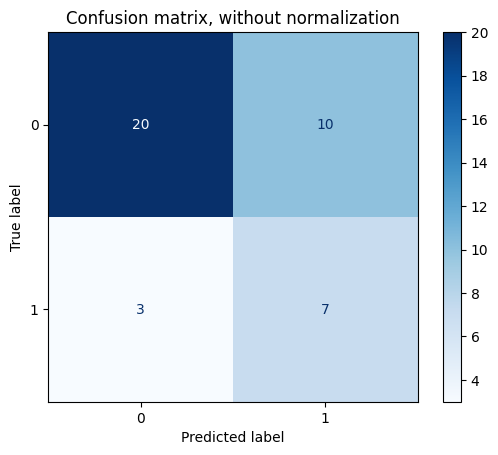

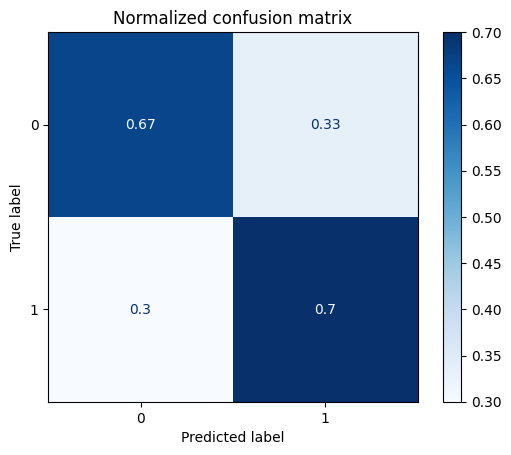

In [115]:
#Aslıha Solution 
# Aslıhan's example

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logr,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()